In [69]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.ticker as tic

import lmfit
import vector
import string

from spyral_utils.plot import Histogrammer
from spyral_utils.nuclear import NuclearDataMap
from matplotlib.lines import Line2D

%matplotlib widget
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.labelsize'] = 15

In [70]:
grammer = Histogrammer()

In [71]:
# # Plot drift velocity vs run

# df = pl.read_csv("C:\\Users\\zachs\\Desktop\\e20009_analysis\\e20009_analysis\\e20009_parameters\\drift_velocity.csv")

# # Add drift velocity column (units of cm / sec)
# df = df.with_columns((100/((pl.col("average_window_tb")-pl.col("average_micromegas_tb"))*0.32)).alias("dv"))

# # Add error on drift veclocity column
# df = df.with_columns(((100/(0.32))*pl.Expr.sqrt(pl.col("average_window_tb_error")**2 + pl.col("average_micromegas_tb_error")**2)
#                      /(pl.col("average_window_tb")-pl.col("average_micromegas_tb"))**2).alias("dv_err"))
# dfd = df.to_dict(as_series=False)

# fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, width_ratios=[1,7])
# ax1.errorbar(dfd["run"], dfd["dv"], yerr=dfd["dv_err"], fmt='o', label="Data")
# ax2.errorbar(dfd["run"], dfd["dv"], yerr=dfd["dv_err"], fmt='o', label="Data")

# fig.subplots_adjust(wspace=0.1)

# ax1.set_xlim(105, 129)
# ax2.set_xlim(170, 375)

# ax1.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)

# ax1.yaxis.tick_left()
# ax1.tick_params(right=False)
# ax2.tick_params(left=False)
# ax2.tick_params(right=False)

# # Make break lines on graphs
# d=0.01
# kwargs=dict(transform=ax1.transAxes, color='k', clip_on=False)
# ax1.plot((1-7*d, 1+7*d), (-d,+d), **kwargs)
# ax1.plot((1-7*d, 1+7*d), (1-d,1+d), **kwargs)

# kwargs.update(transform=ax2.transAxes)
# ax2.plot((-d,+d), (1-d,1+d), **kwargs)
# ax2.plot((-d, +d), (-d,+d), **kwargs)

# fig.supxlabel("Run number")
# fig.supylabel(r"Drift velocity (cm/$\mu$s)")
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.savefig("C:\\Users\\zachs\\Desktop\\dv.pdf")
# fig.set_layout_engine("tight") 

In [72]:
# # Plot of fit to good range of excitation spectrum dp

# data = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\excitation_spectra\\transfer_ex_spect.csv", delimiter=',')
# grammer.add_hist1d("ex_spect",40, (-1.0, 4.3))
# grammer.fill_hist1d("ex_spect", data)
# ex = grammer.get_hist1d("ex_spect")

# # Define line shapes
# def gaussian(x, amplitude, center, sigma):
#     model = lmfit.models.GaussianModel()
#     params = model.make_params(amplitude=amplitude, center=center, sigma=sigma)
#     return model.eval(params, x=x)

# def voigt(x, amplitude, center, sigma, gamma):
#     model = lmfit.models.VoigtModel()
#     params = model.make_params(amplitude=amplitude, center=center, sigma=sigma, gamma=gamma)
#     return model.eval(params, x=x)

# # Fit histogram
# peak1 = lmfit.models.GaussianModel(prefix="peak1_")
# peak1_bins, peak1_counts = ex.get_subrange((-0.1, 0.1))
# peak1_bins += 0.5 * ex.bin_width
# peak1_weights = np.sqrt(peak1_counts)
# peak1_weights = np.divide(1, peak1_weights, out=np.zeros_like(peak1_weights), where=peak1_weights!=0.0)
# pars = peak1.guess(x=peak1_bins, data=peak1_counts, weights=peak1_weights)
# pars["peak1_amplitude"].min = 0.1
# pars["peak1_center"].min = -0.07
# pars["peak1_center"].max = 0.08
# pars["peak1_sigma"].min = 0.1
# pars["peak1_sigma"].max = 1.0

# peak2 = lmfit.models.GaussianModel(prefix="peak2_")
# peak2_bins, peak2_counts = ex.get_subrange((0.2, 0.4))
# peak2_bins += 0.5 * ex.bin_width
# peak2_weights = np.sqrt(peak2_counts)
# peak2_weights = np.divide(1, peak2_weights, out=np.zeros_like(peak2_weights), where=peak2_weights!=0.0)
# pars.update(peak2.guess(x=peak2_bins, data=peak2_counts, weights=peak2_weights))
# pars["peak2_amplitude"].min = 0.0
# pars["peak2_center"].min = 0.2
# pars["peak2_center"].max = 0.4
# pars["peak2_sigma"].set(expr="peak1_sigma", vary=False)

# peak3 = lmfit.models.VoigtModel(prefix="peak3_")
# peak3_bins, peak3_counts = ex.get_subrange((1.2, 2.2))
# peak3_bins += 0.5 * ex.bin_width
# peak3_weights = np.sqrt(peak3_counts)
# peak3_weights = np.divide(1, peak3_weights, out=np.zeros_like(peak3_weights), where=peak3_weights!=0.0)
# pars.update(peak3.guess(x=peak3_bins, data=peak3_counts, weights=peak3_weights))
# pars["peak3_amplitude"].min = 0.0
# pars["peak3_center"].min = 1.2
# pars["peak3_center"].max = 2.2

# peak4 = lmfit.models.VoigtModel(prefix="peak4_")
# peak4_bins, peak4_counts = ex.get_subrange((2.4, 2.9))
# peak4_bins += 0.5 * ex.bin_width
# peak4_weights = np.sqrt(peak4_counts)
# peak4_weights = np.divide(1, peak4_weights, out=np.zeros_like(peak4_weights), where=peak4_weights!=0.0)
# pars.update(peak4.guess(x=peak4_bins, data=peak4_counts, weights=peak4_weights))
# pars["peak4_amplitude"].min = 0.0
# pars["peak4_center"].min = 2.4
# pars["peak4_center"].max = 2.9
# pars["peak4_sigma"].set(expr="peak3_sigma", vary=False)

# peak5 = lmfit.models.VoigtModel(prefix="peak5_")
# peak5_bins, peak5_counts = ex.get_subrange((3.1, 3.6))
# peak5_bins += 0.5 * ex.bin_width
# peak5_weights = np.sqrt(peak5_counts)
# peak5_weights = np.divide(1, peak5_weights, out=np.zeros_like(peak5_weights), where=peak5_weights!=0.0)
# pars.update(peak5.guess(x=peak5_bins, data=peak5_counts, weights=peak5_weights))
# pars["peak5_amplitude"].min = 0.0
# pars["peak5_center"].min = 3.1
# pars["peak5_center"].max = 3.6
# pars["peak5_sigma"].set(expr="peak3_sigma", vary=False)

# bkgd = lmfit.models.VoigtModel(prefix="bkgd_")
# bkgd_bins, bkgd_counts = ex.get_subrange((3.8, 4.3))
# bkgd_bins += 0.5 * ex.bin_width
# bkgd_weights = np.sqrt(bkgd_counts)
# bkgd_weights = np.divide(1, bkgd_weights, out=np.zeros_like(bkgd_weights), where=bkgd_weights!=0.0)
# pars.update(bkgd.guess(x=bkgd_bins, data=bkgd_counts, weights=bkgd_weights))
# pars["bkgd_amplitude"].min = 0.0
# pars["bkgd_center"].min = 3.6
# pars["bkgd_center"].max = 4.3
# pars["bkgd_sigma"].set(expr="peak3_sigma", vary=False)

# total_fit = peak1 + peak2 + peak3 + peak4 + peak5 + bkgd
# total_bins = ex.bins[:-1] + ex.bin_width/2
# total_counts = ex.counts
# total_weights = np.sqrt(total_counts)
# total_weights = np.divide(1, total_weights, out=np.zeros_like(total_weights), where=total_weights!=0.0)
# total_result = total_fit.fit(params=pars, x=total_bins, data=total_counts, weights=total_weights)

# comps = total_result.eval_components()

# pnts=np.linspace(-1.0, 4.3, 500)
# gs = gaussian(pnts, total_result.params["peak1_amplitude"].value, total_result.params["peak1_center"].value, total_result.params["peak1_sigma"].value)
# first = gaussian(pnts, total_result.params["peak2_amplitude"].value, total_result.params["peak2_center"].value, total_result.params["peak2_sigma"].value)
# second = voigt(pnts, total_result.params["peak3_amplitude"].value, total_result.params["peak3_center"].value, total_result.params["peak3_sigma"].value, total_result.params["peak3_gamma"].value)
# third = voigt(pnts, total_result.params["peak4_amplitude"].value, total_result.params["peak4_center"].value, total_result.params["peak4_sigma"].value, total_result.params["peak4_gamma"].value)
# fourth = voigt(pnts, total_result.params["peak5_amplitude"].value, total_result.params["peak5_center"].value, total_result.params["peak5_sigma"].value, total_result.params["peak5_gamma"].value)
# backg = voigt(pnts, total_result.params["bkgd_amplitude"].value, total_result.params["bkgd_center"].value, total_result.params["bkgd_sigma"].value, total_result.params["bkgd_gamma"].value)

# fig, ax = plt.subplots(1,1)
# ax.stairs(ex.counts, edges=ex.bins, linewidth=2, label="Data")
# ax.errorbar(ex.bins[:-1] + ex.bin_width/2, ex.counts, yerr=np.sqrt(ex.counts), fmt="o", markersize=0, color="tab:blue", linewidth=2)
# ax.plot(pnts, gs, alpha=0.8)
# ax.plot(pnts, first, alpha=0.8)
# ax.plot(pnts, second, alpha=0.8)
# ax.plot(pnts, third, alpha=0.8)
# ax.plot(pnts, fourth, alpha=0.8)
# ax.plot(pnts, backg, alpha=0.8, linestyle="-.", label="")
# ax.plot(pnts, gs+first+second+third+fourth+backg, linestyle="--", alpha=1, label="Total fit")

# ax.set_xticks(np.linspace(-1, 4, 11))

# ax.set_xlabel("Excitation energy (MeV)")
# ax.set_ylabel("Counts / 133 keV")
# ax.legend()
# plt.xlim(-0.5, 4.0)
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.tight_layout()
# fig.set_layout_engine("tight")

# fig.savefig("C:\\Users\\zachs\\Desktop\\dp_ex_fit.pdf")

In [73]:
# # Plot of fit to good range of excitation spectrum elastic 

# data = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\excitation_spectra\\elastic_ex_spect.csv", delimiter=',')
# grammer.add_hist1d("ex_spect",65, (-2.0, 5.25))
# grammer.fill_hist1d("ex_spect", data)
# ex = grammer.get_hist1d("ex_spect")

# # Define line shape
# def gaussian(x, amplitude, center, sigma):
#     model = lmfit.models.GaussianModel()
#     params = model.make_params(amplitude=amplitude, center=center, sigma=sigma)
#     return model.eval(params, x=x)

# # Fit histogram
# peak1 = lmfit.models.GaussianModel(prefix="peak1_")
# peak1_bins, peak1_counts = ex.get_subrange((-1.0, 1.0))
# peak1_bins += 0.5 * ex.bin_width
# peak1_weights = np.sqrt(peak1_counts)
# peak1_weights = np.divide(1, peak1_weights, out=np.zeros_like(peak1_weights), where=peak1_weights!=0.0)
# pars = peak1.guess(x=peak1_bins, data=peak1_counts, weights=peak1_weights)
# pars["peak1_amplitude"].min = 0.0
# pars["peak1_center"].min = -0.1
# pars["peak1_center"].max = 0.6

# peak2 = lmfit.models.GaussianModel(prefix="peak2_")
# peak2_bins, peak2_counts = ex.get_subrange((2.8, 4.8))
# peak2_bins += 0.5 * ex.bin_width
# peak2_weights = np.sqrt(peak2_counts)
# peak2_weights = np.divide(1, peak2_weights, out=np.zeros_like(peak2_weights), where=peak2_weights!=0.0)
# pars.update(peak2.guess(x=peak2_bins, data=peak2_counts, weights=peak2_weights))
# pars["peak2_amplitude"].min = 0.0
# pars["peak2_center"].min = 2.8
# pars["peak2_center"].max = 4.8

# pars["peak1_sigma"].set(expr="peak2_sigma", vary=False)

# total_fit = peak1 + peak2
# total_bins = ex.bins[:-1] + ex.bin_width/2
# total_counts = ex.counts
# total_weights = np.sqrt(total_counts)
# total_weights = np.divide(1, total_weights, out=np.zeros_like(total_weights), where=total_weights!=0.0)
# total_result = total_fit.fit(params=pars, x=total_bins, data=total_counts, weights=total_weights)

# pnts=np.linspace(-2.0, 5.25, 500)
# gs = gaussian(pnts, total_result.params["peak1_amplitude"].value, total_result.params["peak1_center"].value, total_result.params["peak1_sigma"].value)
# inelastic = gaussian(pnts, total_result.params["peak2_amplitude"].value, total_result.params["peak2_center"].value, total_result.params["peak2_sigma"].value)

# fig, ax = plt.subplots(1,1)
# ax.stairs(ex.counts, edges=ex.bins, linewidth=2, label="Data")
# ax.errorbar(ex.bins[:-1] + ex.bin_width/2, ex.counts, yerr=np.sqrt(ex.counts), fmt="o", markersize=0, color="tab:blue", linewidth=2)
# ax.plot(pnts, gs, alpha=0.8)
# ax.plot(pnts, inelastic, alpha=0.8)
# ax.plot(pnts, gs+inelastic, linestyle="--", alpha=1, label="Total fit")


# ax.set_xlabel("Excitation energy (MeV)")
# ax.set_ylabel("Counts / 112 keV")
# ax.legend()
# plt.xlim(-2.0, 5.25)
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.tight_layout()
# fig.set_layout_engine("tight")

# fig.savefig("C:\\Users\\zachs\\Desktop\\elastic_ex_fit.pdf")

In [74]:
# # Plot 10Be(d,p) efficiency factors

# gs = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\gs_ef.csv", delimiter=',')
# first = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\0.32_ef.csv", delimiter=',')
# second = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\1.78_ef.csv", delimiter=',')
# third = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\2.65_ef.csv", delimiter=',')
# fourth = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\3.40_ef.csv", delimiter=',')

# bin_cent = np.arange(11.5, 38.5, 3)
# bin_edges = np.linspace(10, 37, 10)

# y_ticks = np.linspace(0, 1, 5)
# y_lim = (0, 1.2)
# sub_title_size = 15

# fig, ax = plt.subplots(5,1, sharex=True)

# ax[0].errorbar(bin_cent, gs[:, 0], yerr=gs[:, 1], fmt='None', linewidth=1.1)
# ax[0].stairs(gs[:, 0], bin_edges, linewidth=1.1)
# ax[0].set_ylim(y_lim)
# ax[0].set_yticks(y_ticks)
# ax[0].set_title("G.S.", fontsize=sub_title_size)
# ax[0].set_axisbelow(True)
# ax[0].grid()
# ax[0].set_xlim(10, bin_edges[-1])

# ax[1].errorbar(bin_cent,first[:, 0], yerr=first[:, 1], fmt='None', linewidth=1.1)
# ax[1].stairs(first[:, 0], bin_edges, linewidth=1.1)
# ax[1].set_ylim(y_lim)
# ax[1].set_yticks(y_ticks)
# ax[1].set_title("0.32 MeV", fontsize=sub_title_size)
# ax[1].set_axisbelow(True)
# ax[1].grid()
# ax[1].set_xlim(10, bin_edges[-1])

# ax[2].errorbar(bin_cent, second[:, 0], yerr=second[:, 1], fmt='None', linewidth=1.1)
# ax[2].stairs(second[:, 0], bin_edges, linewidth=1.1)
# ax[2].set_ylim(y_lim)
# ax[2].set_yticks(y_ticks)
# ax[2].set_title("1.78 MeV", fontsize=sub_title_size)
# ax[2].set_axisbelow(True)
# ax[2].grid()
# ax[2].set_xlim(10, bin_edges[-1])

# ax[3].errorbar(bin_cent, third[:, 0], yerr=third[:, 1], fmt='None', linewidth=1.1)
# ax[3].stairs(third[:, 0], bin_edges, linewidth=1.1)
# ax[3].set_ylim(y_lim)
# ax[3].set_yticks(y_ticks)
# ax[3].set_title("2.65 MeV", fontsize=sub_title_size)
# ax[3].set_axisbelow(True)
# ax[3].grid()
# ax[3].set_xlim(10, bin_edges[-1])

# ax[4].errorbar(bin_cent, fourth[:, 0], yerr=fourth[:, 1], fmt='None', linewidth=1.1)
# ax[4].stairs(fourth[:, 0], bin_edges, linewidth=1.1)
# ax[4].set_ylim(y_lim)
# ax[4].set_yticks(y_ticks)
# ax[4].set_title("3.40 MeV", fontsize=sub_title_size)
# ax[4].set_axisbelow(True)
# ax[4].grid()
# ax[4].set_xlim(10, bin_edges[-1])

# ax[4].set_xticks(bin_edges)
# ax[4].set_xlabel(r"$\theta_{CM}$ (deg)")

# fig.supylabel("Efficiency (fraction)")
# fig.set_figheight(11)
# fig.set_figwidth(8.0)
# fig.subplots_adjust(hspace=0.3)
# fig.tight_layout()

# fig.savefig("C:\\Users\\zachs\\Desktop\\dp_ef.pdf")

In [75]:
# # Plot 10Be(d,d') efficiency factors

# elastic = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\elastic_ef.csv", delimiter=',')
# inelastic = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\inelastic_3.37_ef.csv", delimiter=',')

# bin_cent = np.arange(19, 60, 2)
# bin_edges = np.linspace(18, 60, 22)

# x_maj_ticks = np.arange(18, 60, 4)
# x_min_ticks = np.arange(18, 60, 2)
# y_ticks = np.linspace(0, 1, 5)
# y_lim = (0, 1.1)
# sub_title_size = 15

# fig, ax = plt.subplots(2,1, sharex=True)

# ax[0].errorbar(bin_cent, elastic[:, 0], yerr=elastic[:, 1], fmt='None', linewidth=1.1)
# ax[0].stairs(elastic[:, 0], bin_edges, linewidth=1.1)
# ax[0].set_ylim(y_lim)
# ax[0].set_yticks(y_ticks)
# ax[0].set_xticks(x_min_ticks, minor=True)
# ax[0].set_title("Elastic", fontsize=sub_title_size)
# ax[0].grid(which="both")
# ax[0].set_xlim(18, 60)

# ax[1].errorbar(bin_cent,inelastic[:, 0], yerr=inelastic[:, 1], fmt='None', linewidth=1.1)
# ax[1].stairs(inelastic[:, 0], bin_edges, linewidth=1.1)
# ax[1].set_ylim(y_lim)
# ax[1].set_xlim(18, 60)
# ax[1].set_yticks(y_ticks)
# ax[1].set_xticks(x_min_ticks, minor=True)
# ax[1].set_title("3.37 MeV", fontsize=sub_title_size)
# ax[1].grid(which="both")

# ax[1].set_xticks(x_maj_ticks)
# ax[1].set_xlabel(r"$\theta_{CM}$ (deg)")

# fig.supylabel("Efficiency (fraction)")
# fig.set_figheight(6.0)
# fig.set_figwidth(8.0)
# fig.subplots_adjust(hspace=0.3)
# fig.tight_layout()

# fig.savefig("C:\\Users\\zachs\\Desktop\\elastic_ef.pdf")

In [76]:
# # Make plot of reconstructed vs simulated angle for 10Be+d

# rec = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\recon_vs_sim\\elastic_recon.csv", delimiter=',')
# sim = pl.read_csv("C:\\Users\\zachs\\Desktop\\data4plots\\recon_vs_sim\\elastic_sim.csv")

# # Find events with multiple analyzed tracks
# mult_sort, mult_count = np.unique(rec[:, 0].astype(int), return_counts=True)

# df = sim.clear()
# for mult in range(1, np.max(mult_count)+1):
#     sub_frame = sim.filter(pl.col("event").is_in(mult_sort[mult_count==mult]))
#     sub_frame = pl.concat([sub_frame]*mult)
#     df = pl.concat([df, sub_frame])
# df = df.sort("event", descending=False)

# grammer.add_hist2d("rvs", (360, 360), ((0.0, 180.0), (0.0, 180)))
# grammer.fill_hist2d("rvs", np.rad2deg(df.select("cm_angle").to_numpy().flatten()), np.rad2deg(rec[:, 1]))
# hist = grammer.get_hist2d("rvs")

# fig, ax = plt.subplots(1,1)
# mesh = ax.pcolormesh(hist.x_bins, hist.y_bins, hist.counts, norm='log')
# fig.colorbar(mesh, ax=ax, label="Counts")
# ax.set_xlabel(r"Simulated $\theta_{CM}$ (deg)")
# ax.set_ylabel(r"Reconstructed $\theta_{CM}$ (deg)")
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.tight_layout()

# fig.savefig("C:\\Users\\zachs\\Desktop\\recon_vs_sim.pdf", dpi=50)

In [77]:
# # Plot time correction factors for a pad

# factors = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\time_correction\\time_correction_results.npy")
# pad = 4632

# fig, ax = plt.subplots(1,1)
# ax.errorbar(factors[pad, 2, :6], factors[pad, 0, :6], yerr=factors[pad, 1, :6], xerr=factors[pad, 3, :6], fmt='o')
# ax.set_title(f"")
# ax.set_xlabel("Signal amplitude (ADC units)")
# ax.set_ylabel("Time correction (time buckets)")
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# ax.set_xlim(500, 3000)
# fig.tight_layout()

# fig.savefig("C:\\Users\\zachs\\Desktop\\time_correction_pad.pdf")

In [78]:
# # Plot 10Be(d,d') angular distributions

# elastic = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\elastic_xs_ep.csv", delimiter=',')
# inelastic = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\inelastic_3.37_xs_ep.csv", delimiter=',')

# # Schmitt elastic
# schmitt_el = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\other_experiments\\schmitt_elastic_18mev.csv", delimiter=',', skip_header=1)
# schmitt_inel = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\other_experiments\\schmitt_inelastic_18mev.csv", delimiter=',', skip_header=1)

# def ruth_xs(mp, zp, mt, zt, ep, ang):
#     mp *= 931.502
#     mt *= 931.502
#     e_cm = np.sqrt(((mp + mt)**2) + 2 * mt * ep) - (mp + mt)
#     c1 = (zp * zt * 1.439976)**2
#     c2 = (4 * e_cm)**(-2)
#     return 10 * c1 * c2 / np.sin(ang / 2)**4

# schmitt_meas = schmitt_el[:, 1] * ruth_xs(2.014101777844, 1, 10.01353469, 4, 18, np.deg2rad(schmitt_el[:, 0]))
# schmitt_meas_err = schmitt_el[:, 2] * ruth_xs(2.014101777844, 1, 10.01353469, 4, 18, np.deg2rad(schmitt_el[:, 0]))

# title_list = ["Elastic", "3.37 MeV"]

# fig, ax = plt.subplots(2,1, sharex=True)

# x_maj_ticks = np.linspace(19, 59, 11)
# x_min_ticks = np.linspace(19, 59, 21)

# ax[0].errorbar(elastic[:, 0], elastic[:, 2], yerr=elastic[:, 3], xerr=elastic[:, 1], fmt='o', label="Present")
# ax[0].errorbar(schmitt_el[:, 0], schmitt_meas, yerr=schmitt_meas_err,  fmt='^', label="Schmitt $\it{et}$ $\it{al.}$")
# ax[0].legend()
# ax[0].semilogy()
# # ax[0].grid(which="both")

# ax[1].errorbar(inelastic[:, 0], inelastic[:, 2], yerr=inelastic[:, 3], xerr=inelastic[:, 1], fmt='o', label="3.37 MeV")
# ax[1].errorbar(schmitt_inel[:, 0], schmitt_inel[:, 1], yerr=schmitt_inel[:, 2],  fmt='^', label="Schmitt $\it{et}$ $\it{al.}$")
# # ax[1].grid(which="both")

# ax[1].set_ylim(0,18)
# ax[1].set_xticks(x_min_ticks, minor=True)
# ax[1].set_xticks(x_maj_ticks)
# ax[1].set_xlabel(r"$\theta_{CM}$ (deg)")
 
# for idx, axis in enumerate(ax):    
#     axis.text(0.03, 0.07, title_list[idx], transform=axis.transAxes,  size=13)

# temp = tic.MaxNLocator(5, integer=True)
# ax[1].yaxis.set_major_locator(temp)

# fig.supylabel(r"$d\sigma / d\Omega$ (mb / sr)")
# fig.set_figheight(8.0)
# fig.set_figwidth(8.0)
# fig.subplots_adjust(wspace=0, hspace=0)

# fig.savefig("C:\\Users\\zachs\\Desktop\\elastic_xs.pdf")

In [79]:
# # Compare elastic to OMPs

# elastic = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\elastic_xs_ep.csv", delimiter=',', skip_header=1)
# da1p = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\elastic_scattering\\da1p\\da1p_elastic_mid.csv", delimiter=',', skip_header=1)
# an_cai = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\elastic_scattering\\an_cai\\an_cai_elastic_mid.csv", delimiter=',', skip_header=1)
# fit = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\elastic_scattering\\fit\\fit_elastic_mid.csv", delimiter=',', skip_header=1)

# fig, ax = plt.subplots(1,1)
# ax.errorbar(elastic[:, 0], elastic[:, 2], yerr=elastic[:, 3], xerr=elastic[:, 1], fmt='o', label="Experiment")
# ax.plot(da1p[:, 0], da1p[:, 1], label="DA1p", color="tab:orange", linestyle="-")
# ax.plot(an_cai[:, 0], an_cai[:, 1], label="An Cai", color="tab:green", linestyle="--")
# ax.plot(fit[:, 0], fit[:, 1], label="Fit", color="tab:red", linestyle="dotted")
# ax.semilogy()

# ax.set_xlim(18, 60)
# ax.set_ylim(1e-1, 2e3)

# ax.set_xlabel(r"$\theta_{CM}$ (deg)")
# ax.set_ylabel(r"$d\sigma / d\Omega$ (mb / sr)")

# ax.legend()
# fig.set_figheight(6.0)
# fig.set_figwidth(8.0)
# fig.set_layout_engine("tight")

# fig.savefig("C:\\Users\\zachs\\Desktop\\elastic_xs_fit.pdf")

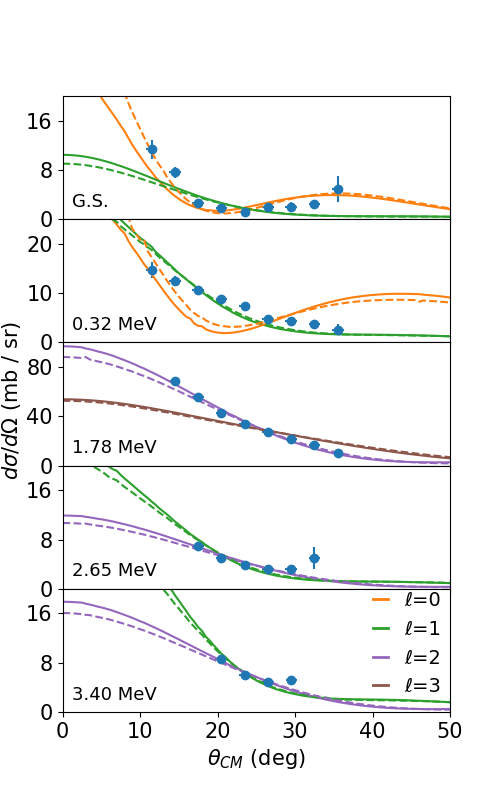

In [ ]:
# # Plot 10Be(d,p) angular distributions

# gs = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_gs_xs_ep.csv", delimiter=',')
# first = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_0.32_xs_ep.csv", delimiter=',')
# second = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_1.78_xs_ep.csv", delimiter=',')
# third = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_2.65_xs_ep.csv", delimiter=',')
# fourth = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_3.40_xs_ep.csv", delimiter=',')

# # DA1p
# gs_da1p = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\gs\\mid.npz")
# gs_da1p_alt = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\gsn\\mid.npz")

# first_da1p = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\0.32\\mid.npz")
# first_da1p_alt = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\0.32p\\mid.npz")

# second_da1p = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\1.78\\mid.npz")
# second_da1p_alt = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\1.78n\\mid.npz")

# third_da1p = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\2.65\\mid.npz")
# third_da1p_alt = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\2.65p\\mid.npz")

# fourth_n_da1p = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\3.40n\\mid.npz")
# fourth_p_da1p = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\3.40p\\mid.npz")

# # An Kai
# gs_ankai = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\gs\\mid.npz")
# gs_ankai_alt = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\gsn\\mid.npz")

# first_ankai = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\0.32\\mid.npz")
# first_ankai_alt = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\0.32p\\mid.npz")

# second_ankai = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\1.78\\mid.npz")
# second_ankai_alt = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\1.78n\\mid.npz")

# third_ankai = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\2.65\\mid.npz")
# third_ankai_alt = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\2.65p\\mid.npz")

# fourth_n_ankai = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\3.40n\\mid.npz")
# fourth_p_ankai = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\3.40p\\mid.npz")


# title_list = ["G.S.", "0.32 MeV", "1.78 MeV", "2.65 MeV", "3.40 MeV"]

# fig, ax = plt.subplots(5,1, sharex=True)

# # x_maj_ticks = np.linspace(11, 39, 8)
# # x_maj_ticks = np.linspace(11, 59, 8)
# # x_min_ticks = np.linspace(13, 35, 12)

# ax[0].errorbar(gs[:, 0], gs[:, 2], yerr=gs[:, 3], xerr=gs[:, 1], fmt='o', label="Experiment")
# ax[0].plot(gs_da1p["angle"], gs_da1p["cross"]*0.90, color="tab:orange")
# ax[0].plot(gs_da1p_alt["angle"], gs_da1p_alt["cross"]*0.25, color="tab:green")

# ax[0].plot(gs_ankai["angle"], gs_ankai["cross"]*1.07, linestyle="--", color="tab:orange")
# ax[0].plot(gs_ankai_alt["angle"], gs_ankai_alt["cross"]*0.18, linestyle="--", color="tab:green")
# ax[0].set_ylim(0,20)

# #///////////////////////////////////////////////////////////////////////////////

# ax[1].errorbar(first[:, 0], first[:, 2], yerr=first[:, 3], xerr=first[:, 1], fmt='o', label="0.32 MeV")
# ax[1].plot(first_da1p["angle"], first_da1p["cross"]*0.81, color="tab:green")
# ax[1].plot(first_da1p_alt["angle"], first_da1p_alt["cross"]*2.16, color="tab:orange")

# ax[1].plot(first_ankai["angle"], first_ankai["cross"]*0.63, linestyle="--", color="tab:green")
# ax[1].plot(first_ankai_alt["angle"], first_ankai_alt["cross"]*2.02, linestyle="--", color="tab:orange")
# ax[1].set_ylim(0,25)

# #///////////////////////////////////////////////////////////////////////////////

# ax[2].errorbar(second[:, 0], second[:, 2], yerr=second[:, 3], xerr=second[:, 1], fmt='o', label="1.78 MeV")
# ax[2].plot(second_da1p["angle"], second_da1p["cross"]*0.88, color="tab:purple")
# ax[2].plot(second_da1p_alt["angle"], second_da1p_alt["cross"]*1.73, color="tab:brown")

# ax[2].plot(second_ankai["angle"], second_ankai["cross"]*0.68, linestyle="--", color="tab:purple")
# ax[2].plot(second_ankai_alt["angle"], second_ankai_alt["cross"]*1.37, linestyle="--", color="tab:brown")
# ax[2].set_ylim(0,100)

# #///////////////////////////////////////////////////////////////////////////////

# ax[3].errorbar(third[:, 0], third[:, 2], yerr=third[:, 3], xerr=third[:, 1], fmt='o', label="2.65 MeV")
# ax[3].plot(third_da1p["angle"], third_da1p["cross"]*0.30, color="tab:green")
# ax[3].plot(third_da1p_alt["angle"], third_da1p_alt["cross"]*0.16, color="tab:purple")

# ax[3].plot(third_ankai["angle"], third_ankai["cross"]*0.24, linestyle="--", color="tab:green")
# ax[3].plot(third_ankai_alt["angle"], third_ankai_alt["cross"]*0.12, linestyle="--", color="tab:purple")
# ax[3].set_ylim(0,20)

# #///////////////////////////////////////////////////////////////////////////////

# ax[4].errorbar(fourth[:, 0], fourth[:, 2], yerr=fourth[:, 3], xerr=fourth[:, 1], fmt='o', label="3.40 MeV")
# ax[4].plot(fourth_n_da1p["angle"], fourth_n_da1p["cross"]*0.52, color="tab:green")
# ax[4].plot(fourth_p_da1p["angle"], fourth_p_da1p["cross"]*0.24, color="tab:purple")

# ax[4].plot(fourth_n_ankai["angle"], fourth_n_ankai["cross"]*0.40, linestyle="--", color="tab:green")
# ax[4].plot(fourth_p_ankai["angle"], fourth_p_ankai["cross"]*0.18, linestyle="--", color="tab:purple")
# ax[4].set_ylim(0,20)

# legend_elements = [
#     Line2D([0], [0], color='tab:orange', lw=2, label='ℓ=0'),
#     Line2D([0], [0], color='tab:green', lw=2, label='ℓ=1'),
#     Line2D([0], [0], color='tab:purple', lw=2, label='ℓ=2'),
#     Line2D([0], [0], color='tab:brown', lw=2, label='ℓ=3'),
# ]

# plt.rcParams['legend.fontsize'] = 14

# # ax[4].set_xticks(x_maj_ticks)
# # ax[4].set_xticks(x_min_ticks, minor=True)
# ax[4].set_xlabel(r"$\theta_{CM}$ (deg)")

# for idx, axis in enumerate(ax): 
#     axis.text(0.025, 0.1, title_list[idx], transform=axis.transAxes,  size=13)
#     temp = tic.MaxNLocator(3, integer=True, min_n_ticks=3)
#     axis.yaxis.set_major_locator(temp)
#     # axis.set_aspect(np.diff(axis.get_xlim())/np.diff(axis.get_ylim()) * 0.4)

# fig.supylabel(r"$d\sigma / d\Omega$ (mb / sr)",x=0.0)
# fig.set_figheight(8.0)
# fig.set_figwidth(5.0)
# plt.xlim(0, 50)
# fig.subplots_adjust(wspace=0, hspace=0)

# fig.legend(handles=legend_elements, frameon=False, loc=(0.73,0.12), handlelength=0.8)

# fig.savefig("C:\\Users\\zachs\\Desktop\\dp_xs.pdf")

In [81]:
# # Plot 3.40 angular distribution

# fourth = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_3.40_xs_ep.csv", delimiter=',')

# #DA1p
# fourth_n_da1p = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\3.40n\\mid.npz")
# fourth_p_da1p = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\da1p\\3.40p\\mid.npz")

# # An Kai
# fourth_n_ankai = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\3.40n\\mid.npz")
# fourth_p_ankai = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\3.40p\\mid.npz")

# # # Fit
# # fourth_n_fit = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\elastic_fit\\3.40n\\mid.npz")
# # fourth_p_fit = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\elastic_fit\\3.40p\\mid.npz")

# fig, ax = plt.subplots(1,1)
# ax.errorbar(fourth[:, 0], fourth[:, 2], yerr=fourth[:, 3], xerr=fourth[:, 1], fmt='o')
# ax.plot(fourth_n_da1p["angle"], fourth_n_da1p["cross"]*0.52, color="tab:orange", linestyle="-", label=r"$\ell=1$, $\chi^{2}_{\nu}=6.37$")
# ax.plot(fourth_p_da1p["angle"], fourth_p_da1p["cross"]*0.24, color="tab:orange", linestyle="-", label=r"$\ell=2$, $\chi^{2}_{\nu}=3.21$")

# ax.plot(fourth_n_ankai["angle"], fourth_n_ankai["cross"]*0.40, color="tab:green", linestyle="--", label=r"$\ell=1$, $\chi^{2}_{\nu}=5.31$")
# ax.plot(fourth_p_ankai["angle"], fourth_p_ankai["cross"]*0.18, color="tab:green", linestyle="--", label=r"$\ell=2$, $\chi^{2}_{\nu}=2.88$")

# # ax.plot(fourth_n_fit["angle"], fourth_n_fit["cross"]*0.44, color="tab:red", linestyle="dotted", label=r"$\ell=1$, $\chi^{2}_{\nu}=3.76$")
# # ax.plot(fourth_p_fit["angle"], fourth_p_fit["cross"]*0.22, color="tab:red", linestyle="dotted", label=r"$\ell=2$, $\chi^{2}_{\nu}=3.24$")

# ax.set_xlabel(r"$\theta_{CM}$ (deg)")
# ax.set_ylabel(r"$d\sigma / d\Omega$ (mb / sr)")
# ax.set_ylim(0,20)
# ax.set_xlim(0,60)

# ax.legend()
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.tight_layout()

# fig.savefig("C:\\Users\\zachs\\Desktop\\3.40_xs.pdf")


In [82]:
# # Plot error distributions

# elastic = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\fit_error\\elastic_err_spect.csv", delimiter=',')
# grammer.add_hist1d("transfer_err",500, (0, 2e-4))
# grammer.fill_hist1d("transfer_err", elastic)
# elastic_hist = grammer.get_hist1d("transfer_err")

# transfer = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\fit_error\\transfer_err_spect.csv", delimiter=',')
# grammer.add_hist1d("transfer_err",500, (0, 2e-4))
# grammer.fill_hist1d("transfer_err", transfer)
# transfer_hist = grammer.get_hist1d("transfer_err")

# title_list = [r"$^{10}$Be", r"$^{11}$Be"]

# fig, ax = plt.subplots(2,1, sharex=True)

# ax[0].stairs(elastic_hist.counts, edges=elastic_hist.bins, linewidth=1)
# ax[0].axvline(1e-4, linewidth=1, linestyle="--", color="red")
# ax[0].semilogy()

# ax[1].stairs(transfer_hist.counts, edges=transfer_hist.bins, linewidth=1)
# ax[1].axvline(1e-4, linewidth=1, linestyle="--", color="red")
# ax[1].semilogy()

# ax[1].set_xlim(0, 2e-4)
# ax[1].set_xlabel("Average distance (m)")
 
# for idx, axis in enumerate(ax):    
#     axis.text(0.90, 0.90, title_list[idx], transform=axis.transAxes,  size=15)

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# fig.supylabel(r"Counts / $4e^{-7}$ m")
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.subplots_adjust(wspace=0, hspace=0)

# fig.savefig("C:\\Users\\zachs\\Desktop\\err_hists.pdf")

In [83]:
# # Spectroscopic factor extraction

# # Cross sections
# state = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_gs_xs_ep.csv", delimiter=',', skip_header=1)
# # state = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_0.32_xs_ep.csv", delimiter=',', skip_header=1)
# # state = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_1.78_xs_ep.csv", delimiter=',', skip_header=1)
# # state = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_2.65_xs_ep.csv", delimiter=',', skip_header=1)
# # state = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\xs_gate_err\\xs_with_err\\dp_3.40_xs_ep.csv", delimiter=',', skip_header=1)

# # Theory
# theory = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\theory_calculations\\an_cai\\gs\\mid.npz")

# calc = lambda x, A: A * np.interp(x, theory["angle"], theory["cross"])

# params = lmfit.Parameters()
# params.add("A", value=1, min=0)
# lineshape = lmfit.Model(calc)

# fit_weights = np.divide(1, state[:, 3], out=np.zeros_like(state[:, 3]), where=state[:, 3] != 0.0)
# # fit_weights = np.divide(1, fit_weights, out=np.zeros_like(fit_weights), where=fit_weights!=0.0)
# total_result = lineshape.fit(params=params, x=state[:, 0], data=state[:, 2], weights=fit_weights)

# total_result

In [84]:
# fig, ax = plt.subplots(1,1)
# ax.errorbar(state[:, 0], state[:, 2], yerr=state[:, 3], xerr=state[:, 1], fmt='o', label="Experiment")
# ax.plot(theory["angle"], theory["cross"]*total_result.params["A"].value, label=fr"Theory, S={total_result.params['A'].value:.2f} $\pm$ {total_result.params['A'].stderr:.2f}")
# plt.legend()
# fig.savefig("C:\\Users\\zachs\\Desktop\\new_sf\\da1p\\3.40p.pdf")